In [ ]:
#cd F:\India_elevation\Whole India 30 Arc Sec

In [1]:
# Libraries
import os
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from rioxarray.merge import merge_arrays
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as xrr
from shapely.geometry import mapping
#from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')

In [2]:
data1 = xrr.open_rasterio(r'E:\India_Elevation\30 ArcSec\10n060e_20101117_gmted_med300.tif') 
# data2 = xrr.open_rasterio(r'D:\India_Elevation\15 Arc Sec\10n090e_20101117_gmted_med150.tif')
# data3 = xrr.open_rasterio(r'D:\India_Elevation\15 Arc Sec\10s060e_20101117_gmted_med150.tif')
# data4 = xrr.open_rasterio(r'D:\India_Elevation\15 Arc Sec\10s090e_20101117_gmted_med150.tif')
# data5 = xrr.open_rasterio(r'D:\India_Elevation\15 Arc Sec\30n060e_20101117_gmted_med150.tif')
# data6 = xrr.open_rasterio(r'D:\India_Elevation\15 Arc Sec\30n090e_20101117_gmted_med150.tif')


In [ ]:
data = merge_arrays([data1,data2,data3,data4,data5,data6])

In [3]:
da = data1.where(data1 != -32768,np.nan)
da

<xarray.DataArray (band: 1, y: 2400, x: 3600)>
array([[[1468., 1477., 1502., ..., 5279., 5366., 5430.],
        [1437., 1443., 1465., ..., 5280., 5348., 5572.],
        [1400., 1409., 1429., ..., 5372., 5303., 5516.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]]])
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 60.0 60.01 60.02 60.03 ... 89.97 89.98 89.99 90.0
  * y            (y) float64 30.0 29.99 29.98 29.97 ... 10.03 10.02 10.01 10.0
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0

In [15]:
da.to_netcdf('D:/India_Elevation/USGS_EROS_GMTED2010_15_Arc_Sec.nc')

In [ ]:
plt.pcolormesh(data1.x,data1.y,data1[0])

In [ ]:
## Clipping using geopandas

In [ ]:
import geopandas as gpd

ele = data1[0]
ele.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
ele.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = gpd.read_file(r'D:\India_Elevation\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm0.shp', crs="epsg:4326")

clipped = ele.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=True)
del data1

In [ ]:
## Plotting

In [5]:
fname= r'E:\India_Elevation\Indian Shape Files\india_states_2019\india_states_2019.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'E:\India_Elevation\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm0.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())
fname3 = r"E:\India_Elevation\Indian Shape Files\MMRDA_ShapeFile\MMRDA_Manual.shp"
adm1_shapes3 = list(shpreader.Reader(fname3).geometries())




fig=plt.figure(figsize=(9,18))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)
def main():
    ax1 = plt.subplot(1,1, 1, projection=ccrs.PlateCarree())   
    ax1.set_extent([70.5,75,17,21], ccrs.PlateCarree())    
    # ax1.set_title(f'Terra & Aqua MAIAC Land AOD Daily 1km & on ERA5 100m winds on {days[i][0:2]+days[i][3:6]+days[i][7:]}')
#         filled_c = ax1.contourf(data01.x, data01.y, data01.band_data[i,:,:],  
#                             60, transform=ccrs.PlateCarree(),vmin=0, vmax=1,cmap='jet')
    filled_c = ax1.pcolormesh(da.x, da.y, da[0],  
                        transform=ccrs.PlateCarree(),vmin=0, vmax=1500,cmap='jet')
#     ax1.quiver(era.longitude,era.latitude,np.array(era.u100[i,:,:]),np.array(era.v100[i,:,:]),regrid_shape=25)#
# #                 scale=100,scale_units='xy')
    ax1.coastlines('50m')
    # ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
    #               edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    # ax1.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
    #             edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax1.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
#     ax1.text(0.27, 0.1, '20/10/2022', horizontalalignment='center', verticalalignment='center',
#              fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
#         ax1.plot( 73.6477,17.9307, marker = '*',markersize = 10)


    ax1.plot(73.16126, 18.93236, marker='^',color = 'g',label='Amity',markersize = 8)
    ax1.plot(72.8373,19.1073,  marker='^',color = 'r',label='DJSCE',markersize = 8)
    ax1.plot( 72.8287,19.3841, marker='^',color = 'c',label='VCET',markersize = 8)
    ax1.plot( 73.11,19.22, marker='^',color = 'm',label='KDMC',markersize = 8)

    Drawing_uncolored_circle1 = plt.Circle( (73.16126, 18.93236 ),
                                      1, color='g',lw = 4,
                                      fill = False )
    Drawing_uncolored_circle2 = plt.Circle( (72.8373,19.1073 ),
                                      1, color='r',lw = 4,
                                      fill = False )
    Drawing_uncolored_circle3 = plt.Circle( (72.8287,19.3841),
                                      1, color='c', lw = 4,
                                      fill = False )
    Drawing_uncolored_circle4 = plt.Circle( (73.11,19.22),
                                      1, color='m', lw = 4,
                                      fill = False )
    
 
    # ax1.set_aspect( 1 )
    ax1.add_artist( Drawing_uncolored_circle1 )
    ax1.add_artist( Drawing_uncolored_circle2 )
    ax1.add_artist( Drawing_uncolored_circle3 )
    ax1.add_artist( Drawing_uncolored_circle4 )


    ax1.legend()
    # Create the axis for the colorbars
    ax2 = fig.add_axes([0.185,   #= >away from x axis
                         0.3,   #= position up and down
                         0.5,   #= width of cbar
                         0.01])  # vertical vidth
    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=0, vmax=1500)
    # Create an empty ScalarMappable to set the colorbar's colormap and norm.
    # The following gives a basic continuous colorbar with ticks and labels.
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
            cax=ax2, orientation='horizontal')#, label='Some Units'
    
    
    
#         plt.title(f'Terra & Aqua MAIAC Land Aerosol Optical Depth Daily 1km on {days[i][0:2]+days[i][3:6]+days[i][7:]}')
if __name__ == '__main__':
    main()
plt.savefig(r'E:\India_Elevation\7.5 ArcSec\Try7.jpg',bbox_inches='tight',dpi=720)

Error in callback <function flush_figures at 0x0000028C717AC360> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
clipped.plot(vmin=0,vmax=500,cmap='terrain')

In [ ]:
clipped.min()

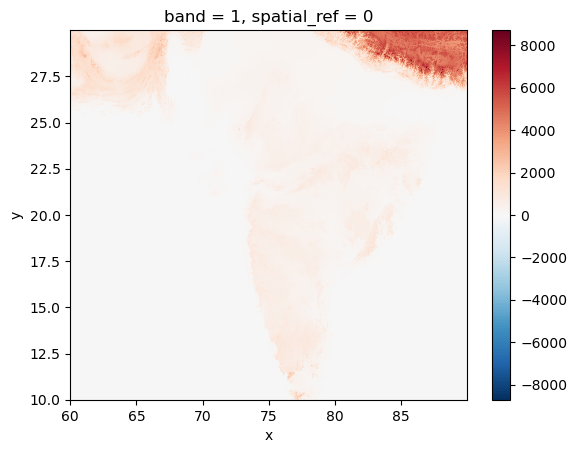

In [3]:
data1.plot()

In [ ]:
1. Amity University, Panvel: 18.93236 N, 73.16126 E, height: 110m
2. DJSCE, Vile Parle West: 19.1073 N, 72.8373 E, height: 37m
3. VCET, Vasai West: 19.3841 N, 72.8287 E, height: 40m
4. KDMC, Kalyan East: 19.22 N, 73.11 E, height: 120m

ax1.plot(18.93236, 73.16126, marker='*',label='Amity')
ax1.plot(19.1073, 72.8373, marker='*',label='DJSCE')
ax1.plot(19.3841, 72.8287, marker='*',label='VCET')
ax1.plot(19.22, 73.11, marker='*',label='KDMC')


In [20]:
data1

<xarray.DataArray (band: 1, y: 9600, x: 14400)>
array([[[1487, 1478, ..., 5512, 5557],
        [1481, 1475, ..., 5454, 5513],
        ...,
        [   0,    0, ...,    0,    0],
        [   0,    0, ...,    0,    0]]], dtype=int16)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 60.0 60.0 60.01 60.01 ... 89.99 89.99 90.0 90.0
  * y            (y) float64 30.0 30.0 29.99 29.99 ... 10.01 10.01 10.0 10.0
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0